In [1]:
import scanpy as sc
#read 10x dataset
un_pro_rna=sc.read_10x_h5("neuron_10k_v3_filtered_feature_bc_matrix.h5")
un_pro_rna.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... storing 'feature_types' as categorical
... storing 'genome' as categorical


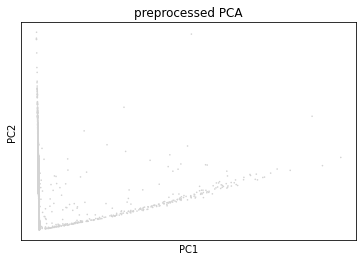

In [2]:
#pca before filtering
sc.tl.pca(un_pro_rna)
sc.pl.pca(un_pro_rna,title="preprocessed PCA")

In [3]:
pro_rna=sc.pp.recipe_zheng17(un_pro_rna,copy=True)

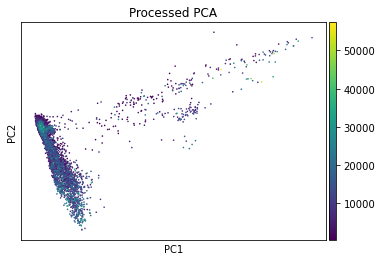

In [4]:
pca=sc.tl.pca(pro_rna,copy=True)
sc.pl.pca(pca,title="Processed PCA",color='n_counts_all')
#color is number of reads

In [5]:
sc.pp.neighbors(pca, n_neighbors=10, n_pcs=40)
sc.tl.leiden(pca)

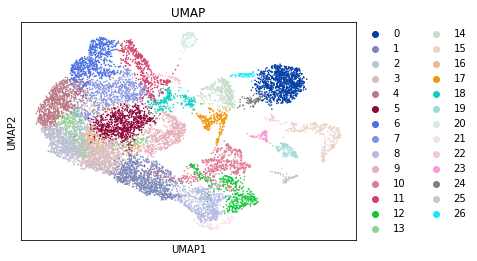

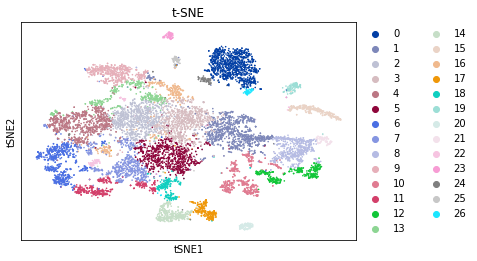

In [6]:
#UMAP and t-SNE
sc.tl.umap(pca)
sc.pl.umap(pca,color='leiden',use_raw=False, title='UMAP')
sc.tl.tsne(pca)
sc.pl.tsne(pca, color='leiden',use_raw=False, title='t-SNE')

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:408: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


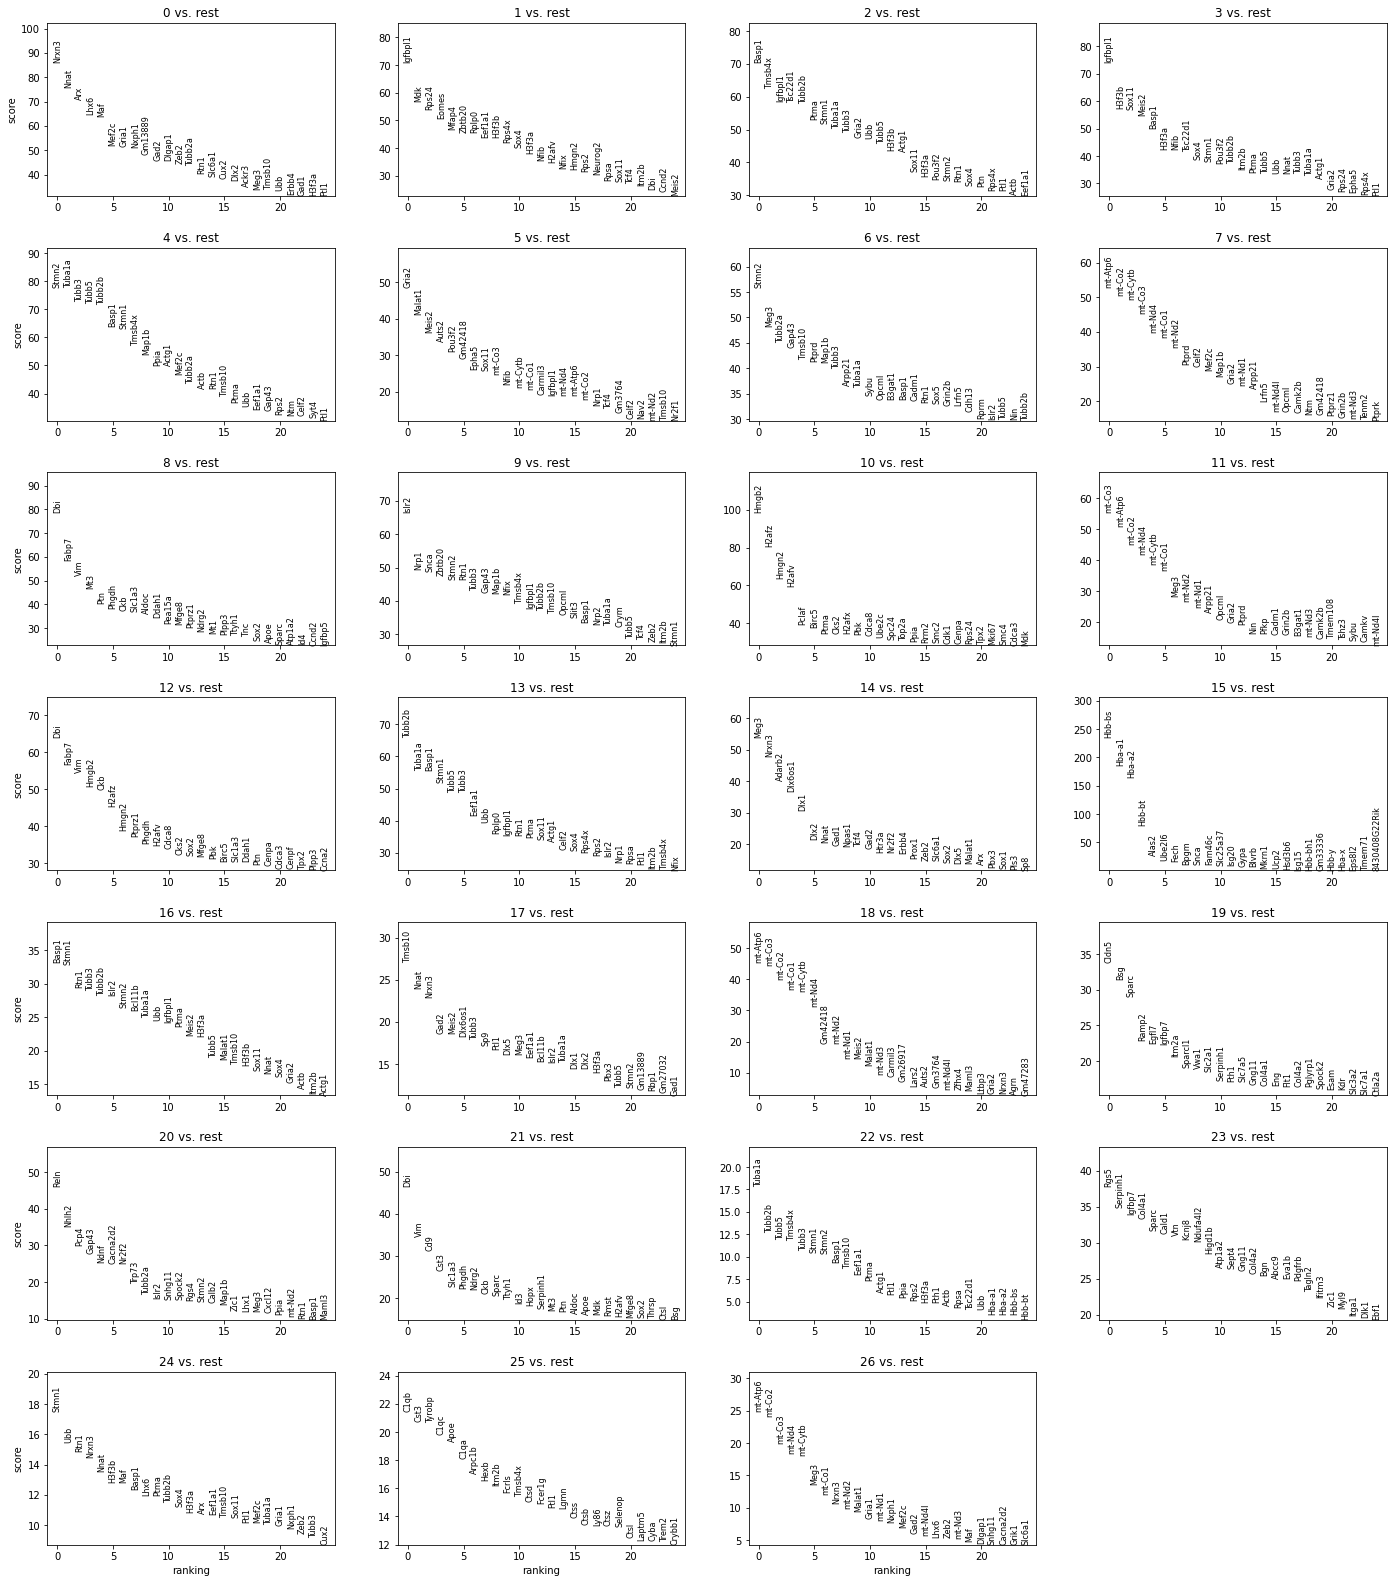

In [11]:
#T-test genes between clusters
sc.tl.rank_genes_groups(pca, 'leiden', method='t-test')
sc.pl.rank_genes_groups(pca, n_genes=25, sharey=False)
pca.write("t-test_genes.csv")

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


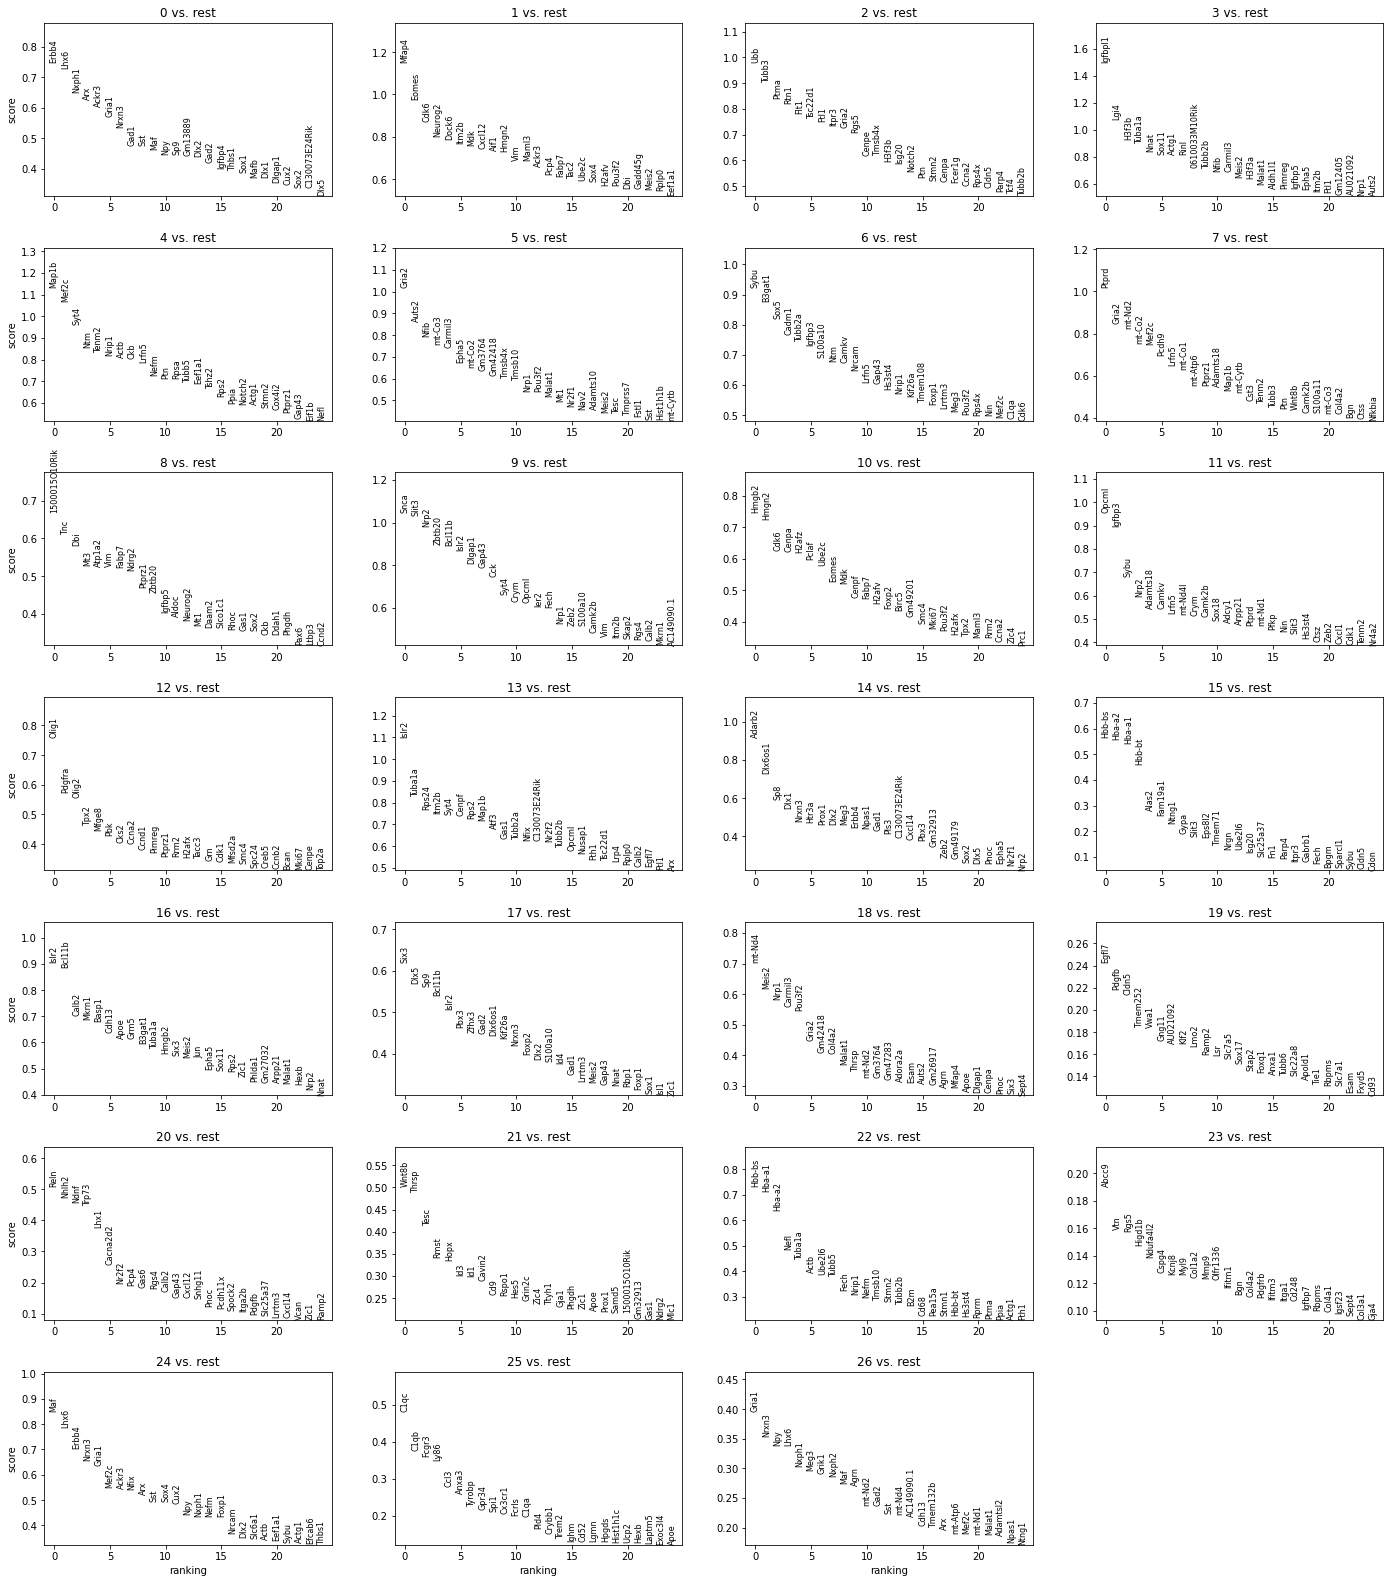

In [22]:
#Logistic Regression genes between clusters
sc.tl.rank_genes_groups(pca, 'leiden', method='logreg')
sc.pl.rank_genes_groups(pca, n_genes=25, sharey=False)
pca.write("logistic_genes")

In [7]:
#Preprocesses tSNA
sc.tl.tsne(pca)

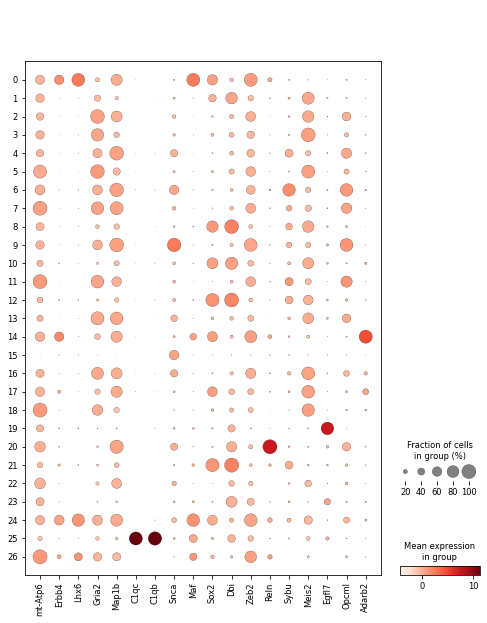

In [9]:
#Testing out some of the top marker genes for uniqueness 
marker_genes=["mt-Atp6","Erbb4","Lhx6","Gria2","Map1b","C1qc","C1qb","Snca","Maf","Sox2","Dbi","Zeb2","Reln","Sybu","Meis2","Egfl7","Opcml","Adarb2"]
sc.pl.dotplot(pca, marker_genes, groupby='leiden')

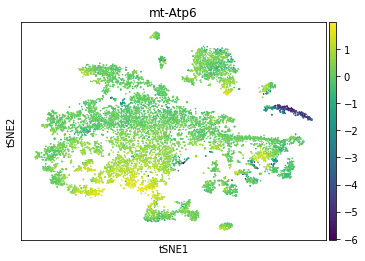

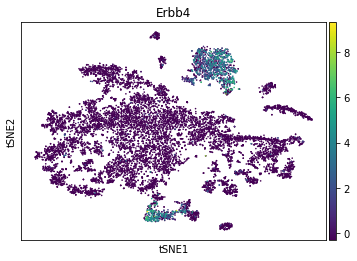

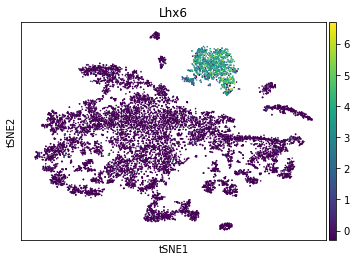

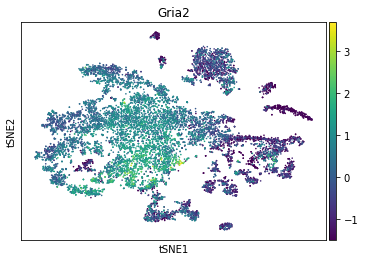

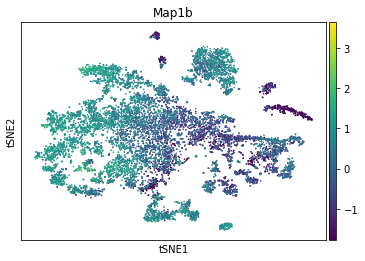

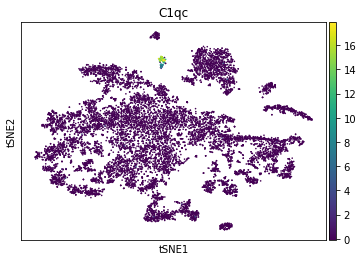

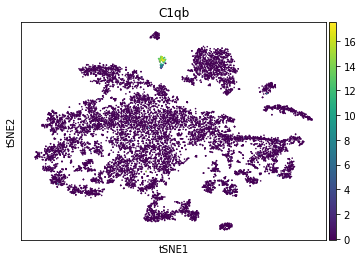

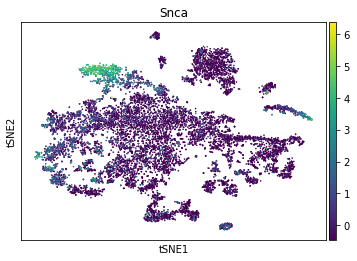

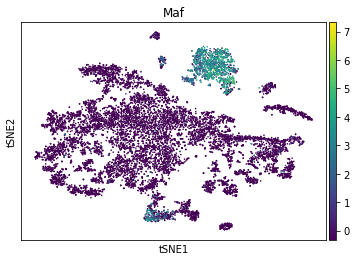

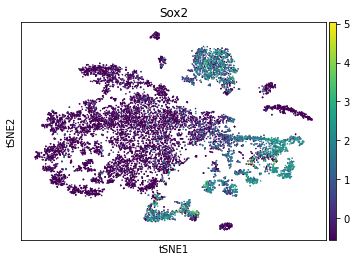

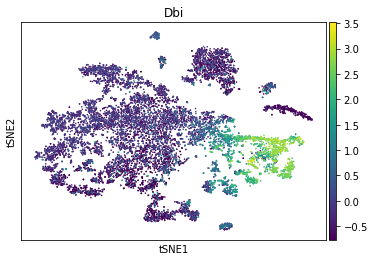

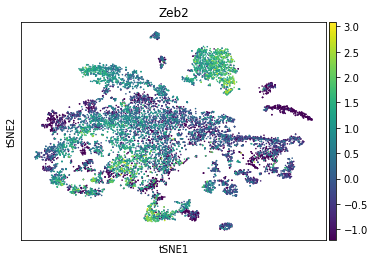

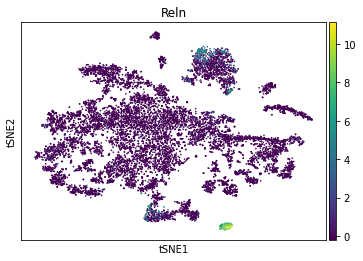

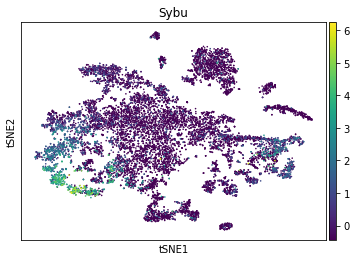

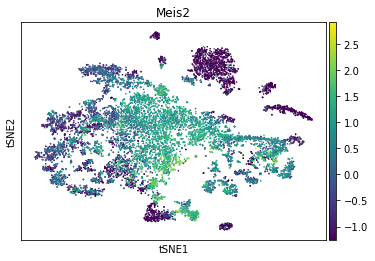

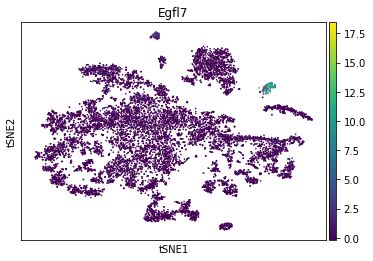

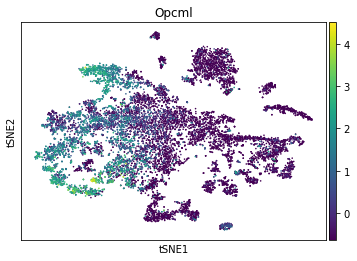

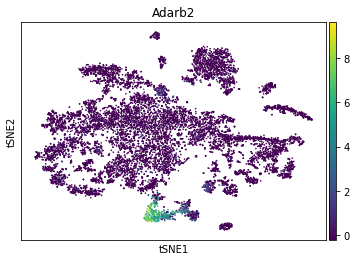

In [11]:
#supporting tSNE for each gene that we examined earlier 
for gene in marker_genes:
    sc.pl.tsne(pca, color=gene,use_raw=False, title=gene)
    

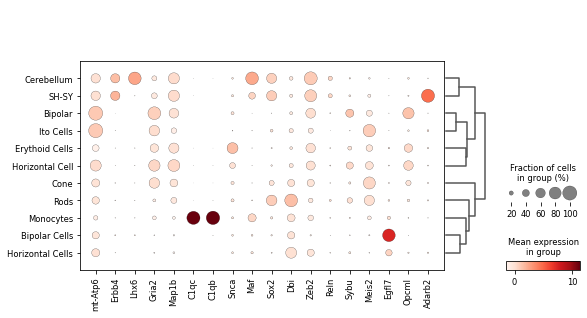

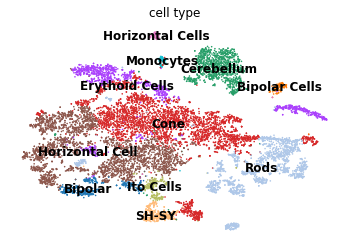

In [10]:
cluster2annotation = {
    '0': 'Cerebellum',
    '1': 'Cone',
    '2': 'Cone',
    '3': 'Cone',
    '4': 'Horizontal Cell',
    '5': 'Horizontal Cell',
    '6': 'Horizontal Cell',
    '7': 'Horizontal Cell',
    '8': 'Rods',
    '9': 'Erythoid Cells',
    '10': 'Rods',
    '11': 'Bipolar',
    '12': 'Rods',
    '13': 'Cone',
    '14': 'SH-SY',
    '15': 'Erythoid Cells',
    '16': 'Erythoid Cells',
    '17': 'Cone',
    '18': 'Ito Cells',
    '19': 'Bipolar Cells',
    '20': 'Rods',
    '21': 'Rods',
    '22': 'Rods',
    '23': 'Horizontal Cells',
    '24': 'Cerebellum',
    '25': 'Monocytes',
    '26': 'Cerebellum',
}
pca.obs['cell type'] = pca.obs['leiden'].map(cluster2annotation).astype('category')
sc.pl.dotplot(pca, marker_genes, 'cell type', dendrogram=True)
sc.pl.tsne(pca, color='cell type', legend_loc='on data', frameon=False, legend_fontsize=12, size = 10)